In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import caffe

In [4]:
import cv2

In [3]:
net = caffe.Net('../data/model/deploy.prototxt', '../data/model/snapshot.caffemodel', caffe.TEST)

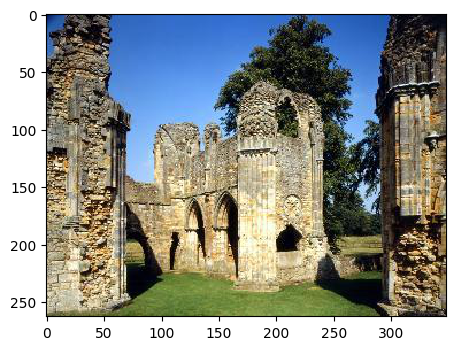

In [5]:
image = cv2.imread('../data/images/a_abbey_abbey_000111.jpg')
plt.imshow(image[:, :, (2, 1, 0)])

In [6]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2, 0, 1))  # move image channels to outermost dimension        

In [7]:
transformed_image = transformer.preprocess('data', image)

/Users/danilonunes/.virtualenvs/imret2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [8]:
net.blobs['data'].data[...] = transformed_image

In [10]:
output = net.forward()

In [11]:
segmentation = output[net.outputs[-1]][0].argmax(axis=0)

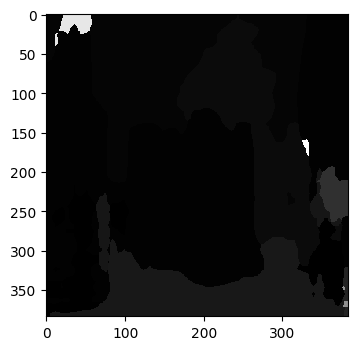

In [14]:
plt.imshow(segmentation, cmap='gray')

In [17]:
import pandas as pd
df = pd.read_csv('../data/model/objectInfo150.txt', sep='\t').set_index('Idx')
df.head()

,Ratio,Train,Val,Name
Idx,,,,
1,0.1576,11664,1172,wall
2,0.1072,6046,612,"building, edifice"
3,0.0878,8265,796,sky
4,0.0621,9336,917,"floor, flooring"
5,0.0480,6678,641,tree


In [31]:
cp = ColorPalette('../data/model/name_conversion.csv')
annot = Annotation('../data/query/train_anno/')

In [32]:
from imret.color import ColorPalette
from imret.query import Annotation

In [37]:
for class_id in np.unique(segmentation):
    class_name = df.ix[class_id].Name.split(',')[0]
    if class_name in annot.names:
        print class_id, class_name, cp[class_name]
    else:
        print class_id, class_name, [0, 0, 0]

1 wall [160 128 192]
2 building [  0 192   0]
3 sky [160  64   0]
5 tree [160   0  64]
9 windowpane [0, 0, 0]
10 grass [192 128 192]
14 earth [0, 0, 0]
19 curtain [192 192 128]
53 path [192  64  64]
85 tower [0, 0, 0]
94 pole [0, 0, 0]


In [35]:
'building' in annot.names

True